# Обнаружение фальшивых новостей

Модель для детекции фальшивых новостей предназначена для автоматического определения достоверности новостей, публикуемых в интернете и социальных сетях. Её основная цель — помочь пользователям и организациям выявлять ложные (FAKE) новости и отличать их от реальных (REAL) с высокой точностью, превышающей 90%. Это важно для борьбы с дезинформацией, манипуляцией общественным мнением и поддержания прозрачности в медиапространстве. Для обучения используется данный [датасет](https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv)


Как работает модель:

* Извлечение признаков: Для обработки текстов используется метод TfidfVectorizer, который преобразует текстовые данные в числовое представление, основанное на частоте терминов и обратной частоте документа (TF-IDF). Этот подход позволяет учитывать не только популярные слова, но и их уникальность в контексте новостей.

* Классификация: Модель основана на алгоритме PassiveAggressiveClassifier, который является линейным классификатором и подходит для обработки текстов. Этот алгоритм эффективен для задач, где требуется быстро обновлять модель при добавлении новых данных.

* Обучение: Модель обучается на предоставленном наборе данных, включающем метки REAL и FAKE для новостей.

* Визуализация результатов: Для анализа работы модели и представления результатов используется матрица ошибок (confusion matrix) и другие графики. Эти визуализации помогают лучше понять, насколько хорошо модель различает реальные и фальшивые новости.

Почему это важно:

Фальшивые новости могут оказывать значительное влияние на общественное мнение, политические процессы и социальные взаимодействия. Созданная модель может быть использована:

* СМИ для проверки достоверности источников.
* Платформами социальных сетей для пометки потенциально ложных материалов.
* Исследователями и аналитиками для анализа распространения дезинформации.

Основные характеристики проекта:

* Точность более 90% в классификации новостей.
* Использование проверенных методов машинного обучения: TfidfVectorizer для извлечения признаков и PassiveAggressiveClassifier для классификации.
* Полная визуализация результатов для удобного анализа и демонстрации.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Загрузка данных
url = "https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv"
data = pd.read_csv(url)

# Проверка на наличие пропущенных значений
data.dropna(inplace=True)

Посмотрим распределение классов в вашем наборе данных, чтобы понять баланс между ними.

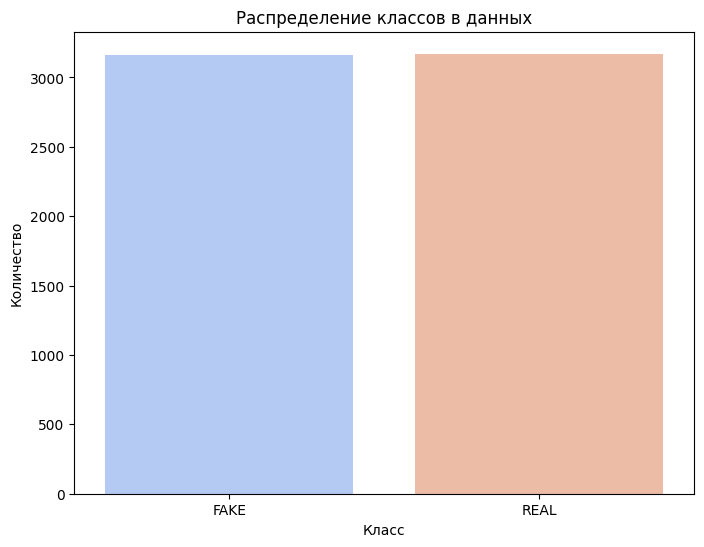

In [3]:
# Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.countplot(x=data['label'], hue=data['label'], palette='coolwarm', legend=False)
plt.title('Распределение классов в данных')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

label указывает модели является ли новость фальшивой или настоящей.
Остальные данные используются для обучения модели.

Так же разделяем данные на тренеровочные и тестовые в соотношении 80/20.

In [4]:
# 2. Разделение на признаки и целевую переменную
X = data['text']
y = data['label']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Текст преобразуется в числовые данные с помощью TfidfVectorizer. Это необходимо, так как алгоритмы машинного обучения работают с числами, а не с текстом.

In [5]:
# 3. Преобразование текста в числовые признаки с помощью TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [6]:
# 4. Создание и обучение модели PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50, random_state=42)
model.fit(X_train_tfidf, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test_tfidf)

In [7]:
# 5. Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

Точность модели: 93.76%


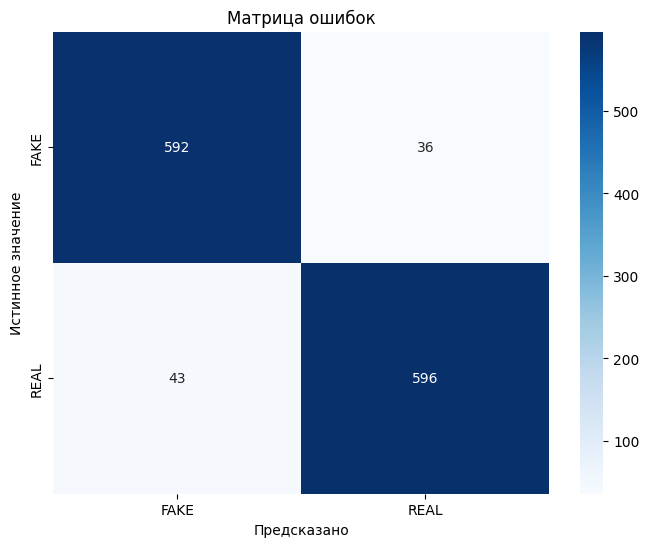

In [8]:
# 6. Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Предсказано')
plt.ylabel('Истинное значение')
plt.title('Матрица ошибок')
plt.show()

Отобразим наиболее важные слова, которые модель считает значимыми для каждого класса.

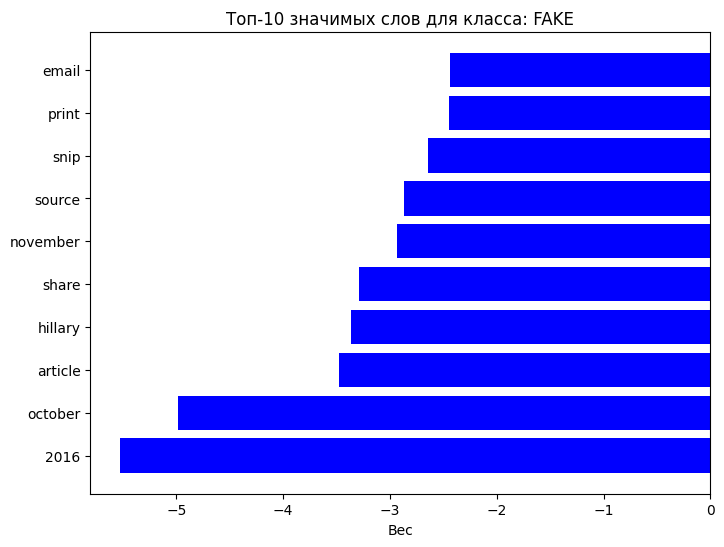

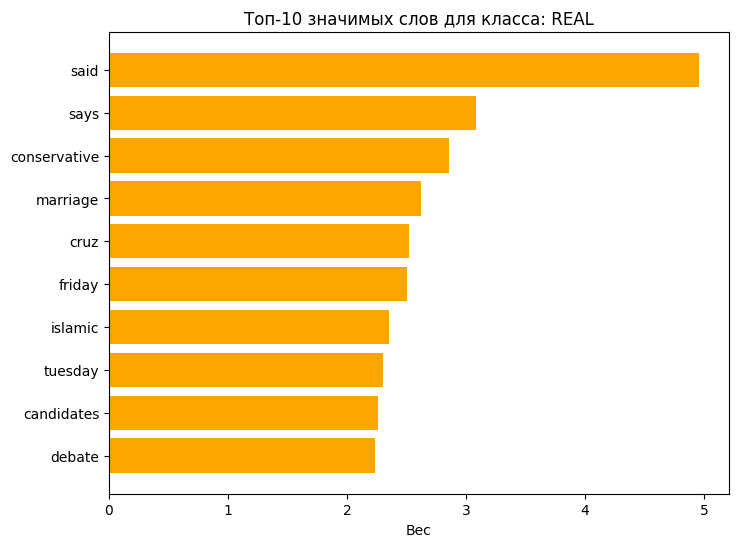

In [9]:
# 7. Визуализация важности слов (топ-10 для классов FAKE и REAL)
feature_names = tfidf_vectorizer.get_feature_names_out()
class_weights = model.coef_[0]  # Веса для бинарной классификации

# Топ-10 слов для класса FAKE (самые низкие веса)
top_fake_indices = np.argsort(class_weights)[:10]
top_fake_features = [feature_names[j] for j in top_fake_indices]
top_fake_weights = class_weights[top_fake_indices]

# Топ-10 слов для класса REAL (самые высокие веса)
top_real_indices = np.argsort(class_weights)[-10:]
top_real_features = [feature_names[j] for j in top_real_indices]
top_real_weights = class_weights[top_real_indices]

# Визуализация для класса FAKE
plt.figure(figsize=(8, 6))
plt.barh(top_fake_features, top_fake_weights, color='blue')
plt.xlabel('Вес')
plt.title('Топ-10 значимых слов для класса: FAKE')
plt.show()

# Визуализация для класса REAL
plt.figure(figsize=(8, 6))
plt.barh(top_real_features, top_real_weights, color='orange')
plt.xlabel('Вес')
plt.title('Топ-10 значимых слов для класса: REAL')
plt.show()


Посмотрим какой процент данных было классифицировано как FAKE и REAL.

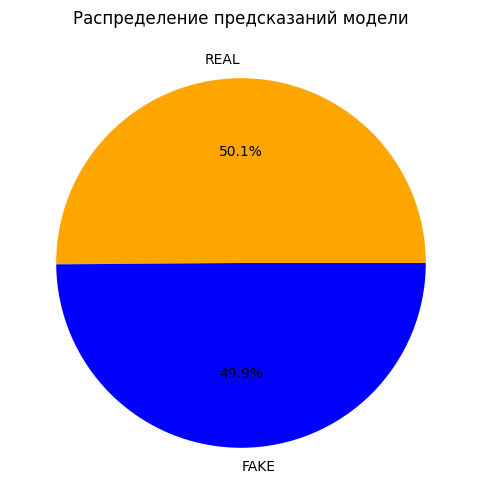

In [10]:
# 8. Круговая диаграмма предсказаний модели
pred_distribution = pd.Series(y_pred).value_counts(normalize=True)

plt.figure(figsize=(8, 6))
pred_distribution.plot(kind='pie', labels=['REAL', 'FAKE'], autopct='%1.1f%%', colors=['orange', 'blue'])
plt.title('Распределение предсказаний модели')
plt.ylabel('')  # Убираем метку оси
plt.show()

Классификационный отчет (Classification Report): Включает показатели точности (Precision), полноты (Recall) и F1-меры.

In [11]:
# 9. Отчет по классификации
print("Отчет по классификации:")
print(classification_report(y_test, y_pred))

Отчет по классификации:
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       628
        REAL       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [12]:
# 10. Примеры предсказаний
sample_indices = np.random.choice(len(X_test), 5, replace=False)
samples = X_test.iloc[sample_indices]
predictions = model.predict(X_test_tfidf[sample_indices])

# Создаем таблицу
result_df = pd.DataFrame({
    'Текст': samples,
    'Истинный класс': y_test.iloc[sample_indices].values,
    'Предсказание': predictions
})

print("\nПримеры предсказаний модели:")
print(result_df)


Примеры предсказаний модели:
                                                  Текст Истинный класс  \
3685  America Has Become A Lawless Nation – Hillary ...           FAKE   
4898  Donald Trump’s looming nomination has spurred ...           REAL   
625   Next Swipe left/right Make music great again, ...           FAKE   
3213  WASHINGTON — In a significant setback for Pres...           REAL   
4618  Notable names include Ray Washburne (Commerce)...           REAL   

     Предсказание  
3685         FAKE  
4898         REAL  
625          FAKE  
3213         REAL  
4618         REAL  
